# 1 - Linear Regression

goal: find the equation

y_true [-5 -3 -1  1  3  5  7  9 11 13]
intercept -5.000000000000002
coef [2.]
y_test_true [-1 11]
y_test_predict [-1. 11.]
score 1.0
mean absolute error 0.0


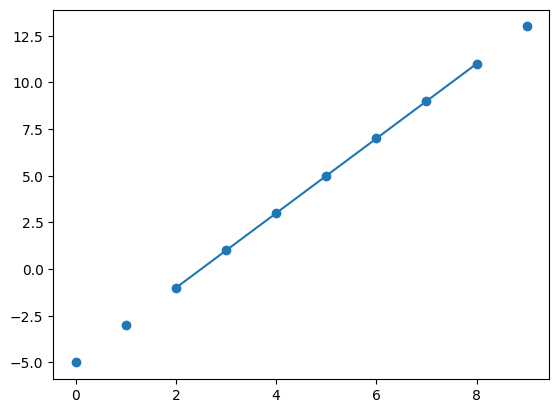

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0,1,2,3,4,5,6,7,8,9])
# y = -5 + 2x
y = -5 + 2 * X
print("y_true", y)
plt.scatter(X, y)

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_true, y_test_true = train_test_split(X[:, np.newaxis], 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train_true)

print("intercept", model.intercept_)
print("coef", model.coef_)

y_test_predict = model.predict(X_test)

print("y_test_true", y_test_true)
print("y_test_predict", y_test_predict)

plt.plot(X_test, y_test_predict)

from sklearn.metrics import mean_absolute_percentage_error

print("score", model.score(X_test, y_test_true))

print("mean absolute error {0:.1f}".format(mean_absolute_percentage_error(y_test_true, y_test_predict)))

In [2]:
print("{0:.0%}".format(1/3))

33%


In [3]:
y_pred = [2.5,  0.0, 2, 8]
y_true = [3  , -0.5, 2, 7]

print("{0:.1f}".format((np.abs((2.5-3)/3) 
                        + np.abs((0+0.5)/0.5) 
                        + np.abs((2-2)/2) 
                        + np.abs((8-7)/7))
                       /4))
print("{0:.1f}".format(mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)))

0.3
0.3


# 2 - dot product

In [4]:
# [[1,1], @ [1,
#  [1,2]]    2]
X = np.array([[1,1],
              [1,2]])
X @ [1,2]

array([3, 5])

In [5]:
X = np.array([[1, 1], 
              [1, 2], 
              [2, 2], 
              [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = X @ [1,
         2] + 3
y == 1 * X[:,0] + 2 * X[:,1] + 3

# [[1,1],     [1,
#  [1,2],   @  2]
#  [2,2],
#  [2,3]]

array([ True,  True,  True,  True])

In [6]:
X[:,0]

array([1, 1, 2, 2])

# 3 - np.random.rand()

It takes shape as args.

In [7]:
# 2 rows with 3 columns
np.random.rand(2,3)

array([[0.27824924, 0.5889668 , 0.90742503],
       [0.26516385, 0.78845712, 0.57368486]])

In [8]:
X = 10 * np.random.RandomState(1).rand(2)
y = 2 * X - 5 + X / 10
y

array([ 3.7574621 , 10.12681436])

# 4 - NDArray.reshape()

In [9]:
# 1 row, 3 columns
X = np.array([0,1,2])

# reshape to 3 rows 1 column
# X.reshape(3,1)
X.reshape(-1,1)

array([[0],
       [1],
       [2]])

# 5 - What it's look like

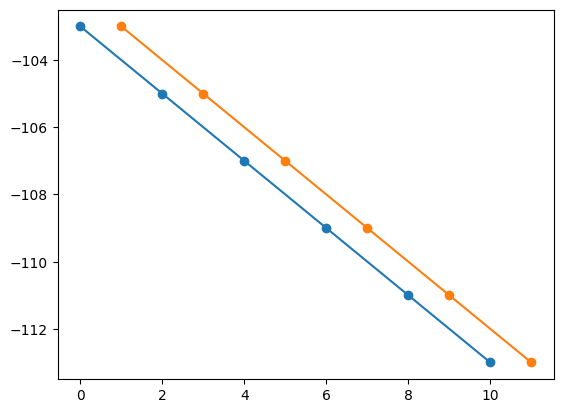

In [10]:
import pandas as pd

X = pd.DataFrame({ 'X1': [0,2,4,6,8,10],
                   'X2': [1,3,5,7,9,11] })
# try to modify the intercept
# try to modify the coefficient
y = -100 + 2 * X['X1'] - 3 * X['X2']

plt.scatter(X['X1'], y)
plt.scatter(X['X2'], y)
plt.plot(X, y)

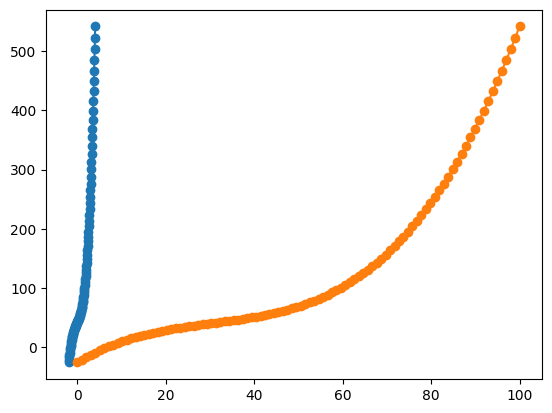

In [11]:
import pandas as pd

X = pd.DataFrame({ 'X1': np.linspace(-2,4  ,100),
                   'X2': np.linspace( 0,100,100) })
# try to modify the intercept
# try to modify the coefficient
y = 2*X['X1']**3 + 3*X['X1']**2 + 4*X['X1']**3 + 1*X['X2'] + 10

plt.scatter(X['X1'], y)
plt.scatter(X['X2'], y)
plt.plot(X, y)

# 6 - Feature Selection

In [12]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = load_iris(as_frame=True)
data

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [13]:
X_new = SelectKBest(chi2, k=2).fit_transform(data.data, data.target)
X_new

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

<AxesSubplot: >

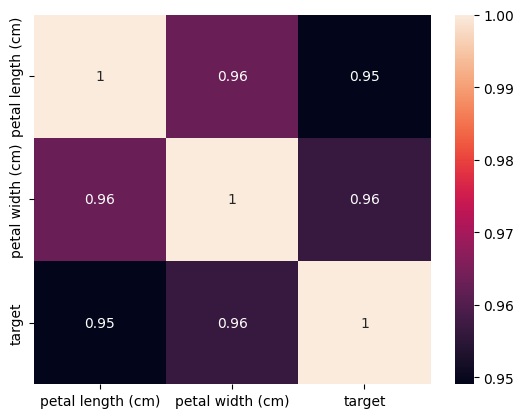

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.concat([data.data, data.target], axis=1)
cols = df.corr() \
         .nlargest(3, 'target')['target'].index[::-1]
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, annot=True, xticklabels=cols.values, yticklabels=cols.values)

# 7 - OneHotEncoder

In [15]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', drop='first')
# gender, age
X = [['Male', 1],
     ['Female', 3],
     ['Female', 2]]
enc.fit(X)

OneHotEncoder(drop='first', handle_unknown='ignore')

In [16]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [17]:
enc.transform([['Female', 1], 
               ['Male', 4]]).toarray()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0.],
       [1., 0., 0.]])

In [18]:
# if you drop the first column to reduce multicollinearity
# beware: if user refuse to give some information. the encoder will be confused and return the first index label.
# e.g gender -> will return Female
#     age    -> will return 1.

# example without dropping first column
# >>> enc.inverse_transform([[0, 1, 1, 0, 0], 
#                            [0, 0, 0, 1, 0]])
# array([['Male', 1],
#        [None, 2]], dtype=object)

# expected result
# array([['Male', 1],
#        [None, 2]], dtype=object)
enc.inverse_transform([[1, 0, 0], 
                       [0, 1, 0]])

array([['Male', 1],
       ['Female', 2]], dtype=object)

In [19]:
enc.get_feature_names_out(['gender', 'group'])

array(['gender_Male', 'group_2', 'group_3'], dtype=object)

In [20]:
pd.DataFrame(data=enc.transform([['Female', 1], 
                                 ['Male', 4]]).toarray(), columns=enc.get_feature_names_out())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,x0_Male,x1_2,x1_3
0,0.0,0.0,0.0
1,1.0,0.0,0.0


# 8 - pd.cut

In [21]:
pd.cut([0.1, 
        0.2,
        1,
        2,
        3,
        4], [0,1,2,3,4]).value_counts()

(0, 1]    3
(1, 2]    1
(2, 3]    1
(3, 4]    1
dtype: int64

# 9 - metrics

## 9.1 - MAE

MAE 0.5 does not mean if `y_true` 3 then `y_pred` is 3 +- 0.5. 

MAE 0.5 means over the course of time, the model will miss the prediction, on average 0.5. 

In some cases, a prediction can miss more than 1. e.g `y_true` 7, `y_pred` 8.

In [22]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

![MAE](./playground/Screen%20Shot%202022-11-05%20at%2019.45.42.png)

In [23]:
np.sum(np.absolute(np.array(y_true) - y_pred)) / len(y_true)

0.5

## 9.2 - MAPE

MAPE is weird.

In [24]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_percentage_error(y_true, y_pred)

0.3273809523809524

![MAPE](./playground/Screen%20Shot%202022-11-05%20at%2019.43.54.png)

In [25]:
np.abs((np.array(y_true) - y_pred) / y_true)

array([0.16666667, 1.        , 0.        , 0.14285714])

In [26]:
np.sum(np.abs((np.array(y_true) - y_pred) / y_true) / len(y_true))

0.3273809523809524

## 9.3 - Accuraccy Score

accuracy_score is for label. if `y_pred[1]` != `y_true[1]` then it is not accurate.

In [27]:
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 2, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.75

## 9.4 - Linear Regression model

[R2 / R-squared means the model explains X% of target difference.](https://www.myaccountingcourse.com/financial-ratios/r-squared)

[R2 formula](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html)

![R^2 comparison](./playground/r-squared.jpeg)

R-squared of 0.69 means that 69% of the differences in `y_test - y_test_pred` can be explained by the `X_test`. The other 31% are in the residuals. They unexplained. The model does not explain that part.

In [28]:
np.array([[1,2],
          [2,3]]) @ [1,
                     2]

array([5, 8])

In [54]:
X_train = np.array([[1, 1], 
                    [1, 2], 
                    [2, 2], 
                    [2, 3]])
X_train[:,[0]]

array([[1],
       [1],
       [2],
       [2]])

In [56]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

X_train = np.array([[1, 1], 
                    [1, 2], 
                    [2, 2], 
                    [2, 3]])

# Feature Selection:
# Data Analyst with his/her personal judgement, 
# believe that column 2 do not have relationship with the target.
# So, we will drop column 2.
X_train = X_train[:,0].reshape(-1,1)

# y = 1*x_0 + 2*x_1 + 3
y_train = [6, 8, 9, 11]
reg = LinearRegression().fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

X_test = np.array([[1,4], [1,5], [2,4], [2,5]])
X_test = X_test[:,0].reshape(-1,1)

y_test = [12,14,13,15]
y_test_pred = reg.predict(X_test)

print("y_train      ", y_train)
print("y_train_pred ", y_train_pred)

print("y_test       ", y_test)
print("y_test_pred  ", y_test_pred)

print("MAE - Train Set:", mean_absolute_error(y_train, y_train_pred))
print("MAE - Test Set:", mean_absolute_error(y_test, y_test_pred))
print("R^2 - Train Set", r2_score(y_train, y_train_pred))
print("R^2 - Test Set:", r2_score(y_test, y_test_pred))

y_train       [6, 8, 9, 11]
y_train_pred  [ 7.  7. 10. 10.]
y_test        [12, 14, 13, 15]
y_test_pred   [ 7.  7. 10. 10.]
MAE - Train Set: 1.0
MAE - Test Set: 5.0
R^2 - Train Set 0.6923076923076923
R^2 - Test Set: -20.6


![R-squared](./playground/Screen%20Shot%202022-11-05%20at%2019.44.52.png)

In [57]:
# SSR = Sum squared residual
SSR = np.sum((y_test - y_test_pred)**2)

# SST = Sum squared total
SST = np.sum((y_test - np.mean(y_test))**2)

# R2 = R squared
R2 = 1 - (SSR/SST)
R2


-20.6